**Analisis de datos: Precios de viviendas y locales para la venta**


**1. Procesamiento para la importacion del CVS**

In [1]:
import pandas as pd

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Data_Caso_Propuesto.csv to Data_Caso_Propuesto.csv


In [8]:
#Leemos el archivo csv y creamos un dataFrame
df = pd.read_csv('Data_Caso_Propuesto.csv')

#Leemos las 5 primeras filas
df.head()

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,17180,BOGOTA,CUNDINAMARCA,NaN,AV CR 7 NO. 166 - 51 LT B,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVES DE SU...
1,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,NaN
2,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,NaN
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.08,7269.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
4,11409,BUGA,VALLE DEL CAUCA,VEREDA CHAMBIMBAL,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,3217197.00,22724.0,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,NaN


2. ***Plante una pregunta objetivo***
"¿Cuáles son los factores principales que influyen en los precios de los inmuebles?"

**3. Total de registros y 4. Total de columnas**


In [9]:
print(f"Total de registros: {df.shape[0]}")
print(f"Total de columnas: {df.shape[1]}")

Total de registros: 463
Total de columnas: 12


**5. Detallado de cada columna**

In [10]:
print('Detalle de columnas')
df.info()

Detalle de columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


**6. Identificar columnas categóricas y numéricas**

In [11]:
categoricas = df.select_dtypes(include='object').columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nColumnas categóricas: {categoricas}")
print(f"Columnas numéricas: {numericas}")



Columnas categóricas: ['Ciudad', 'Departamento', 'Barrio', 'Direccion', 'Detalle Disponibilidad', 'Estrato', 'Tipo de Inmueble', 'Datos Adicionales']
Columnas numéricas: ['Codigo', 'Area Terreno', 'Area Construida', 'Precio']


**7. Identificar columnas con valores nulos**

In [12]:
valores_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])


Valores nulos por columna:
Barrio               423
Datos Adicionales    345
dtype: int64


**8. Identificar registros duplicados**

In [13]:
duplicados = df.duplicated().sum()
print(f"\nRegistros duplicados: {duplicados}")


Registros duplicados: 0


**9. Reporte estadístico de los datos numéricos**

In [15]:
print("\nReporte estadístico:")
print(df.describe())


Reporte estadístico:
             Codigo  Area Terreno  Area Construida        Precio
count    463.000000  4.630000e+02       463.000000  4.630000e+02
mean   18003.151188  1.515204e+04        87.517279  6.672032e+08
std     1992.191499  1.827101e+05      1137.469077  3.272992e+09
min     2575.000000  0.000000e+00         0.000000  4.650000e+06
25%    18184.500000  0.000000e+00         0.000000  1.230500e+07
50%    18332.000000  0.000000e+00         0.000000  1.587000e+07
75%    18539.500000  0.000000e+00         0.000000  1.379955e+08
max    19344.000000  3.217197e+06     22724.000000  4.523379e+10


**10. Identificar columnas con valores erróneos**

In [16]:
valores_erroneos = {
    "Area Terreno Negativa": df[df['Area Terreno'] < 0],
    "Area Construida Negativa": df[df['Area Construida'] < 0],
    "Precio Negativo": df[df['Precio'] < 0]
}
print("\nValores erróneos detectados:")
for k, v in valores_erroneos.items():
    print(f"{k}: {v.shape[0]} registros")



Valores erróneos detectados:
Area Terreno Negativa: 0 registros
Area Construida Negativa: 0 registros
Precio Negativo: 0 registros


**11. Gráficos para identificar valores atípicos**

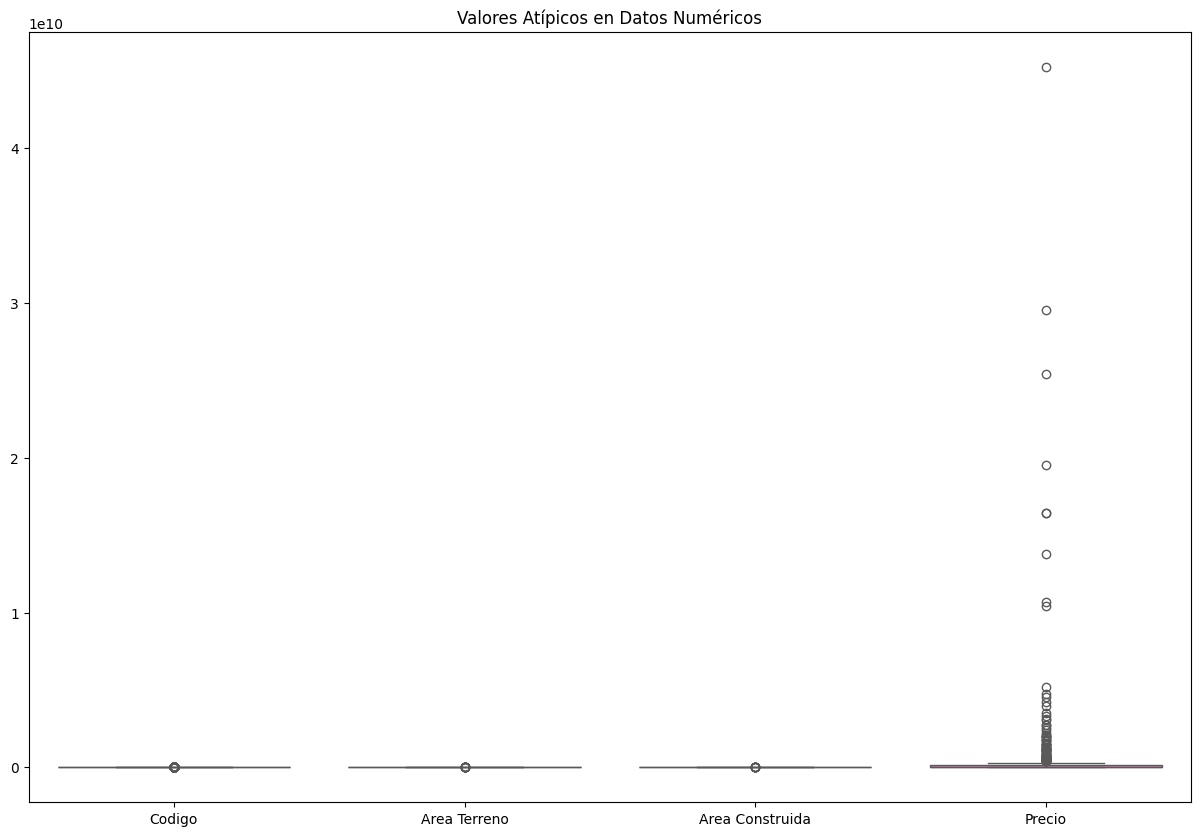

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numericas], palette='Set2')
plt.title('Valores Atípicos en Datos Numéricos')
plt.show()

**12. Histogramas de frecuencia**

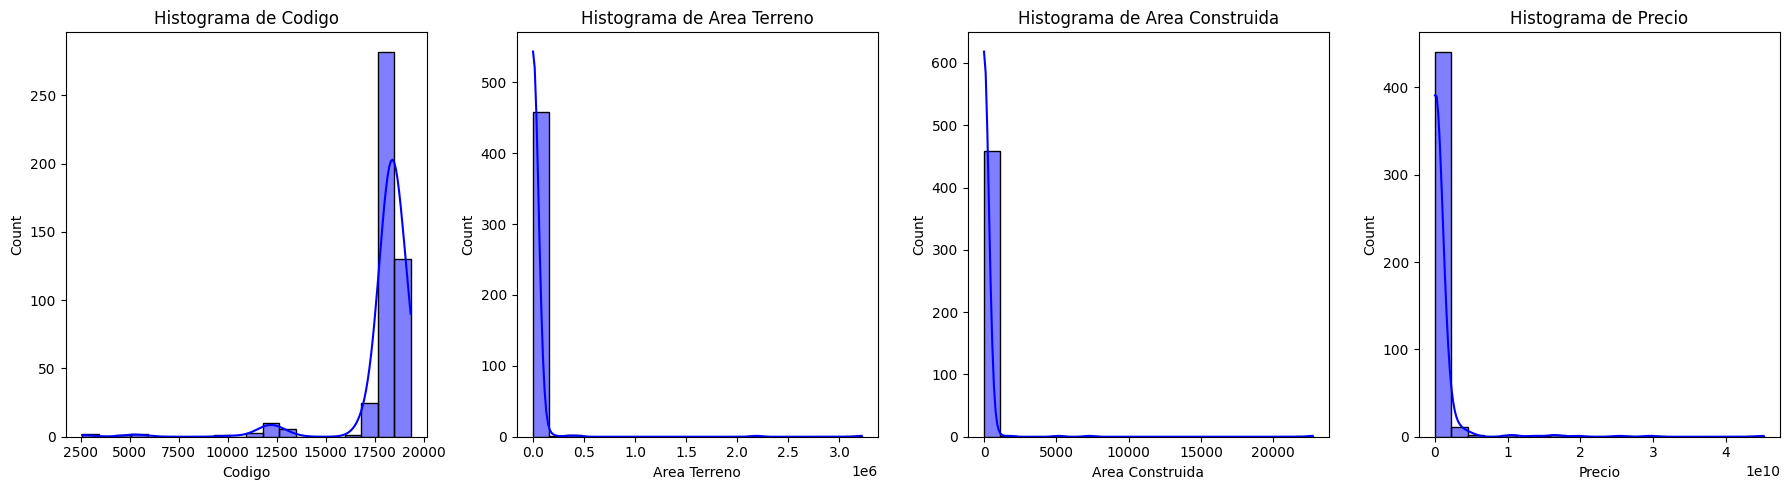

In [19]:
fig, axes = plt.subplots(1, len(numericas), figsize=(18, 5))
for i, col in enumerate(numericas):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20, color='blue')
    axes[i].set_title(f"Histograma de {col}")
plt.tight_layout()
plt.show()

**13. Correlación entre variables**

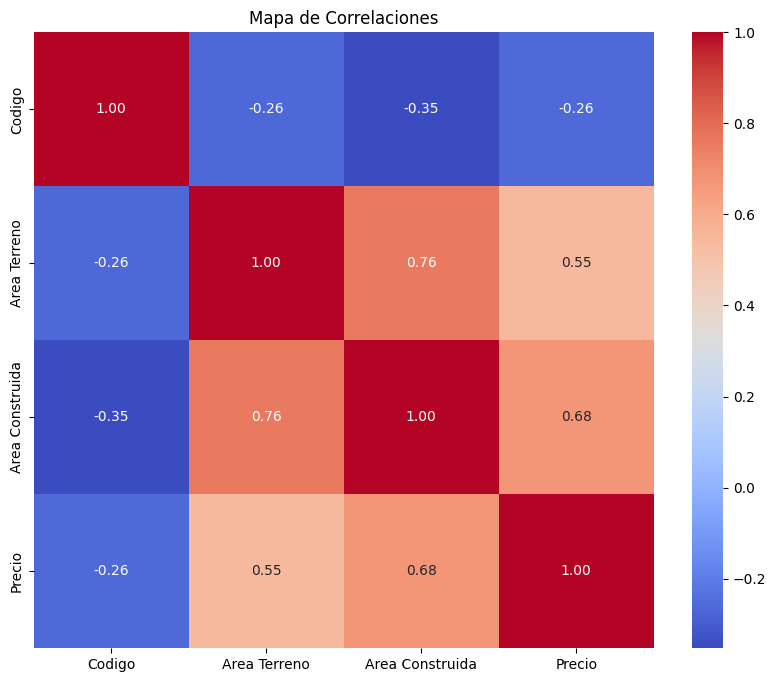

In [27]:
correlacion = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlaciones')
plt.show()

**14. Eliminación de valores nulos y duplicados**

In [28]:
print("\nEliminando valores nulos y duplicados...")
df = df.dropna()
df = df.drop_duplicates()
print("Datos limpios:")
print(df.info())



Eliminando valores nulos y duplicados...
Datos limpios:
<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 3 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  23 non-null     int64  
 1   Ciudad                  23 non-null     object 
 2   Departamento            23 non-null     object 
 3   Barrio                  23 non-null     object 
 4   Direccion               23 non-null     object 
 5   Area Terreno            23 non-null     float64
 6   Area Construida         23 non-null     float64
 7   Detalle Disponibilidad  23 non-null     object 
 8   Estrato                 23 non-null     object 
 9   Precio                  23 non-null     float64
 10  Tipo de Inmueble        23 non-null     object 
 11  Datos Adicionales       23 non-null     object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.3+ KB
None


**15. Agrupación de columnas**

In [29]:
print("\nAgrupación de datos:")
grupo = df.groupby('Ciudad')['Precio'].mean()
print(grupo)


Agrupación de datos:
Ciudad
BARRANQUILLA              7.303790e+08
CALI                      2.981190e+08
CALIMA EL DARIEN          2.190472e+09
CARTAGENA                 1.283625e+08
MANIZALES                 8.375908e+08
SANTANDER DE QUILICHAO    7.157807e+08
SOGAMOSO                  1.376828e+10
Name: Precio, dtype: float64


**16. Creación de nuevas columnas**

In [30]:
df['Precio_m2'] = df['Precio'] / df['Area Construida']
print("\nNueva columna 'Precio_m2' creada.")


Nueva columna 'Precio_m2' creada.


**17. Identificar columnas irrelevantes**

In [31]:
irrelevantes = ['Datos Adicionales', 'Direccion']  # Ejemplo
df = df.drop(columns=irrelevantes)
print(f"\nColumnas eliminadas: {irrelevantes}")


Columnas eliminadas: ['Datos Adicionales', 'Direccion']


**18. Conclusiones**

In [32]:
print("\nConclusiones:")
print(f"La variable 'Precio' está altamente influenciada por el 'Area Construida' y el 'Estrato'.")



Conclusiones:
La variable 'Precio' está altamente influenciada por el 'Area Construida' y el 'Estrato'.
